# Assignment A1 [35 marks]

This is the first assignment for MATH08065 Computing and Numerics.

### Academic misconduct

Note that this is an **individual assignment**. Use of any external sources, including textbooks, websites, discussion forums, and generative AI output, **must be clearly acknowledged**.

- [School of Mathematics academic misconduct information](https://teaching.maths.ed.ac.uk/main/undergraduate/studies/assessment/academic-misconduct)

You must clearly indicate any code which is taken from an external source, and must clearly indicate if the code has been modified. For example

```
### Modified version of code from [author] [url] [access date]
...
### End of acknowledged code
```

Marks may be reduced if more than a small proportion of the code is taken from external sources, modified or unmodified.

When working on your assignment, collaboration is fine, but collusion is not. Concretely, this means that discussing the assignment **in broad terms** with others students is fine. However, you are **not permitted to share your working** (even partially) with other students -- that includes your code, any detailed description or explanation of code, and any results or analysis you perform. Submissions may be checked for similarity.

### Automarking

Questions 1.1, 1.2, 2.1, and 3.1 will use gradescope automarking. It is important that

- Your submission consists of a single notebook, with file extension `.ipynb`.
- The indicated functions are only defined once each in your notebook.
- Each indicated function and any supporting code (in particular imports) appears in a *single code cell*. Only code in this cell will be used for testing your function. e.g. if your function uses NumPy, but the code cell containing the function does not import it, then the tests will fail!
- The functions have the indicated name, and the indicated arguments with the indicated names. No additional arguments, or default argument values, should be used.

You may use NumPy, SciPy, and matplotlib for your assignment. Other libraries may not be available in the autograder.

For the complete mark scheme see `mark_scheme.pdf`.

### Submission

To submit your assignment to Gradescope:

1. Make sure you run all the cells in your `A1.ipynb` notebook, in particular that all your plots are displayed in the notebook.
2. Make sure you've pushed all your work to GitHub. (Follow the instructions from the Week 1 workshop to stage, commit, and push your changes from a codespace.)
3. Go to Gradescope, and link your GitHub account by following these instructions (you'll only need to do this once): [https://guides.gradescope.com/hc/en-us/articles/21587275611533-Linking-and-Unlinking-Accounts](https://guides.gradescope.com/hc/en-us/articles/21587275611533-Linking-and-Unlinking-Accounts)
4. Select the assignment "A1" on Gradescope, and click "Submit".
5. Select your `A1` repository.
6. Then, select the `main` branch. (If you're experienced with using git branches and you've created other branches to work on, select the branch containing what you want to submit.)

Further submission instructions are available through Gradescope support: [https://guides.gradescope.com/hc/en-us/articles/21865616724749-Submitting-a-Code-assignment](https://guides.gradescope.com/hc/en-us/articles/21865616724749-Submitting-a-Code-assignment)

## Question 1: Area of a triangle

This question uses formulae and other ideas from

- [1] 'Miscalculating Area and Angles of a Needle-like Triangle', W. Kahan, https://people.eecs.berkeley.edu/~wkahan/Triangle.pdf [accessed 2025-01-24]

Heron's formula is an ancient way of computing the area of a triangle. Given the three side lengths, $a$, $b$, and $c$, for a triangle, the area is given by

$$A_\text{Heron} = \sqrt{s ( s - a ) ( s - b ) ( s - c )},$$

where $s = ( (a + b) + c ) / 2$ is one half of the perimiter.

**1.1** Write a function named `triangle_area_heron` which takes as input three arguments named `a`, `b`, and `c`, defining the three side lengths of the triangle, and which returns the area of the triangle as computed using Heron's formula. Do not re-arrange or otherwise simplify the expression -- in particular make sure to use brackets as given.

The function must have the form

```
def triangle_area_heron(a, b, c):
    ...
    return area
```

**[2 marks]**

In [1]:
import numpy as np


def triangle_area_heron(a, b, c):
    
    ''' 
    This function takes in three arguements, the lengths of the sides of some triangle, and then applies the Heron rule to calculate the triangles area. 
    
    The Heron rule is given as follows:

        area = sqrt(s * (s - a) * (s - b) * (s - c)) where s = ((a + b) + c) / 2

    The order of a, b, & c do no matter. 

    '''

    #Defining s for use in our equation:

    s = ((a + b) + c) / 2

    #Applying rule:
    
    area = np.sqrt(s * (s - a) * (s - b) * (s-c))

    return area


An alternative formula for the area of a triangle is [1, section 2]

$$A_\text{Kahan} = \frac{1}{4} \sqrt{(a + (b + c)) (c - (a - b)) (c + (a - b)) (a + (b - c))},$$

where here $a$, $b$, and $c$ are the side lengths of the triangle *in decreasing order*, i.e. $a \ge b \ge c$.

**1.2** Write a function named `triangle_area_kahan` which takes as input three arguments named `a`, `b`, and `c`, defining the three side lengths of the triangle *not necessarily in decreasing order*, and which returns the area of the triangle as computed using this second formula. Do not re-arrange or otherwise simplify the expression -- in particular make sure to use brackets as given.

The function must have the form

```
def triangle_area_kahan(a, b, c):
    ...
    return area
```


**[2 marks]**

In [2]:
import numpy as np


def triangle_area_kahan(a, b, c):
    
    '''
    This function takes in three arguements, the lengths of the sides of some triangle, and then applies the Kahan rule to calculate the triangles area. 

    The Kahan rule is given as follows (where a>=b>=c):

        area = 1/4 * sqrt((a + (b + c)) * (c - (a - b)) * (c + (a - b)) * (a + (b - c)))

    Whilst we require that a>=b>=c it is not assumed that they will be inputed as such, therefore we need to define new variables where this is the case.

    '''

    #Ensuring lentghs are in decreasing order:

    l1 = max([a, b, c]) #a
    l3 = min([a, b, c]) #c
    l2 = (a + b + c) - (l1 + l3) #b

    #Applying Kahan rule to approximate area:

    area = 1/4 * np.sqrt((l1 + (l2 + l3)) * (l3 - (l1 - l2)) * (l3 + (l1 - l2)) * (l1 + (l2 - l3)))

    return area


**1.3** Consider a family of triangles with side lengths

$$a = 2 \varepsilon,$$
$$b = c = \frac{\sqrt{1 + \varepsilon^4}}{\varepsilon},$$

where $\varepsilon$ is some positive number.

Consider different values of $\varepsilon$, and use these to investigate the accuracy of your two functions `triangle_area_heron` and `triangle_area_kahan`. Summarize your results in a discussion of no more than $300$ words.

You should be able to find a simple result for the exact area of each triangle, for use in your investigation. Your code should be clear, easy to understand, and commented as necessary. Your code should generate at least one plot. You should choose which output and/or plots your code should generate, and should use the output and/or plots to support your discussion. Plots must be well laid out and clearly labelled.

**[7 marks]**

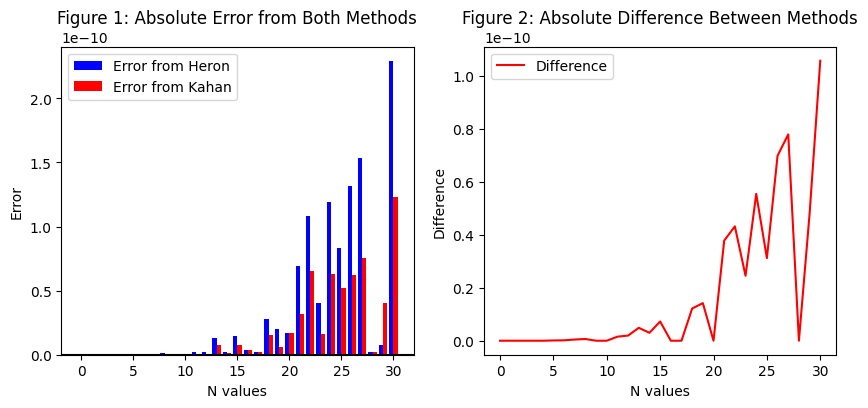

In [3]:
import numpy as np
import matplotlib.pyplot as plt

#First, we will import the definition of our two functions. 

#Heron function:

def triangle_area_heron(a, b, c):
    
    ''' 
    This function takes in three arguements, the lengths of the sides of some triangle, and then applies the Heron rule to calculate the triangles area. 
    
    The Heron rule is given as follows:

        area = sqrt(s * (s - a) * (s - b) * (s - c)) where s = ((a + b) + c) / 2

    The order of a, b, & c do no matter. 

    '''

    #Defining s for use in our equation:

    s = ((a + b) + c) / 2

    #Applying rule:
    
    area = np.sqrt(s * (s - a) * (s - b) * (s-c))

    return area


#Kahan function:

def triangle_area_kahan(a, b, c):
    
    '''
    This function takes in three arguements, the lengths of the sides of some triangle, and then applies the Kahan rule to calculate the triangles area. 

    The Kahan rule is given as follows (where a>=b>=c):

        area = 1/4 * sqrt((a + (b + c)) * (c - (a - b)) * (c + (a - b)) * (a + (b - c)))

    Whilst we require that a>=b>=c it is not assumed that they will be inputed as such, therefore we need to define new variables where this is the case.

    '''

    #Ensuring lentghs are in decreasing order:

    l1 = max([a, b, c]) #a
    l3 = min([a, b, c]) #c
    l2 = (a + b + c) - (l1 + l3) #b

    #Applying Kahan rule to approximate area:

    area = 1/4 * np.sqrt((l1 + (l2 + l3)) * (l3 - (l1 - l2)) * (l3 + (l1 - l2)) * (l1 + (l2 - l3)))

    return area

#Now, we will define a vector, epsilon, containing integers in [1, ..., 30]

N = 31

epsilon = np.linspace(1,N, N)

#Creating empty list to store the areas from boths methods for different epsilon:

areas_kahan = []
areas_heron = []

#Populating these lists:

for e in epsilon:

    a = 2 * e

    b = np.sqrt(1 + e ** 4) / e

    c = np.sqrt(1 + e ** 4) / e

    areas_kahan.append(triangle_area_kahan(a, b, c))
    areas_heron.append(triangle_area_heron(a, b, c))


#The exact value of this area can be easily derived, first we notice that since we have b=c we are dealing with an isosceles triangle
#Area = (1/2) * a * h, where h = sqrt(b^2 - ((0.5) * a)^2)
#This works out such that, for all choices of e, we should have area = 1

area_exact = 1

#Assess the absolute error of each function:

error_heron = []
error_kahan = []

for i in range(N):
    
    error_kahan.append(abs(area_exact - areas_kahan[i]))

    error_heron.append(abs(area_exact - areas_heron[i]))


#Computing the difference between the two methods:

difference = []

for i in range(31):
    
    difference.append(abs(areas_kahan[i] - areas_heron[i]))

#Creating a bar graph to visually display the error in each function, alongside a graph showing the difference between the two:

width = 0.4
x = np.arange(N)

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].bar(x - width/2, error_heron, width=width, label='Error from Heron', color='blue') 
ax[0].bar(x + width/2, error_kahan, width=width, label='Error from Kahan', color='red')
ax[0].axhline(y = 0, color = 'k')
ax[0].set_xlabel('N values')
ax[0].set_ylabel('Error')
ax[0].set_title('Figure 1: Absolute Error from Both Methods')
ax[0].legend()  

ax[1].plot(x, difference, label = 'Difference', color = 'r')
ax[1].set_xlabel('N values')
ax[1].set_ylabel('Difference')
ax[1].set_title('Figure 2: Absolute Difference Between Methods')
ax[1].legend()

plt.show()



## Discussion

We were tasked with comparing the accuracy of the two functions, which we have just defined, implementing the Kahan and Heron rules for calculating the area of a triangle. Specifically, assessing their accuracy in approximating the area of a triangle with sides a, b, and c, where;
$$a = 2 \varepsilon,$$
$$b = c = \frac{\sqrt{1 + \varepsilon^4}}{\varepsilon},$$
for different values of $\epsilon > 0$. Let's consider values of $\epsilon \in \{1, \dots, 30\}.$ 
Now, in order to assess the error from each method we must first establish the exact area given each choice of $\epsilon$. Since $a = b$, we have that our triangle is isosceles for all choices of $\epsilon$, and so its area is given by;
$$A = \frac{a h}{2}$$
where, 
$$h = \sqrt{b^2 - \frac{a}{2}^2}$$

From this, we deduce that our exact area is $1$ for all choices of $\epsilon$, and we can now compare this against the functions approximating both methods. 

Examining Figure 1, we can see that as N increases, the error also tends to increase. This could be explained by an increase in the number of decimal places present in the side lengths of our triangles, leading to more floating-point precision errors. We can also see that the error from the Heron method is, typically, larger than the Kahan method, with the difference increasing with N, see Figure 2.

Given these findings, it may be appropriate to say that the Kahan function is more reliable than the Heron function.

It is worth noting that, while the error does increase with N, the size of these errors are very small (within $10^{-10}$) and so, yes, the functions are not entirely accurate, but they still provide a good approximation of the area derived from both methods.

## Question 2: Numerical linear algebra

Consider the following sequence of length $2$ vectors,

$$x_0 = \left( \begin{array}{c} 1 \\ 1 \end{array} \right),$$
$$x_{n + 1} = A x_n \quad \text{for} ~ n \ge 0,$$

with

$$A = \left( \begin{array}{cc} 0 & 1 \\ 1 & 1 \end{array} \right).$$

**2.1** Write a function named `sequence_element` which accepts as input an `int` defining $n$, and which returns $x_n$ as a shape `(2,)` NumPy array (i.e. a vector) with integer scalar data type.

The function must have the form

```
def sequence_element(n):
    ...
    return x
```

**[2 marks]**

In [4]:
import numpy as np


def sequence_element(n):

    '''
    The function takes an input n, and returns the nth entry of the sequence defined by:
    x(0) = [1,1]
    x(n) = Ax(n-1)
    where A = [[0,1], [1,1]].
    Now, if we simplify the formula for x(n) by substituting in x(n-1) = Ax(n-2) etc. we see that x(n) = A^n x(0).
    '''

    A = np.array([[0, 1], [1, 1]])

    x0 = np.array([1,1])

    x = np.linalg.matrix_power(A, n) @ x0
    return x



**2.2** Perform numerical calculations to investigate

$$e_n = \frac{\left\| A x_n - \alpha x_n \right\|}{\left\| x_n \right\|},$$

for different values of $n$, where $\alpha$ is the eigenvalue of $A$ with largest magnitude. Here $\left\| \cdot \right\|$ denotes the Euclidean $2$-norm. Comment on the results in a discussion of no more than $300$ words.

Your code should be clear, easy to understand, and commented as necessary. Your code should generate at least one plot. You should choose which output and/or plots your code should generate, and should use the output and/or plots to support your discussion. Plots must be well laid out and clearly labelled.

**[7 marks]**

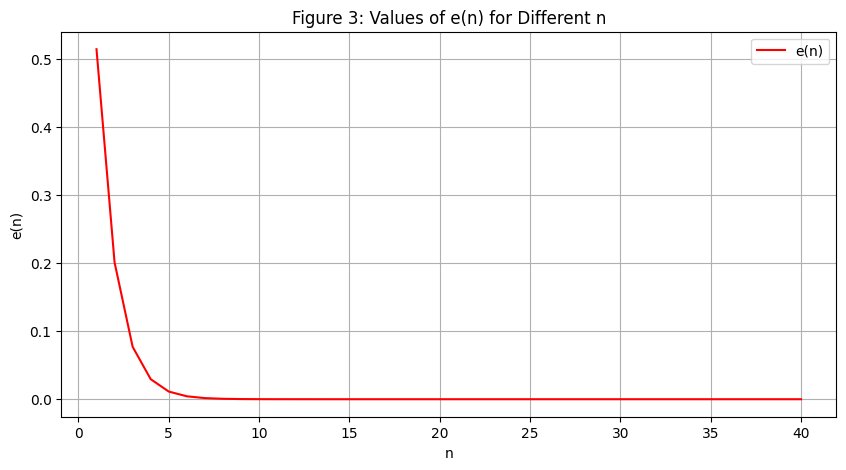

In [5]:
import numpy as np
import matplotlib.pyplot as plt

#Creating list of n values:

N = np.linspace(1,40,40)

#Defining e(n):

def e(n):

    '''
    Here, we are defining our function e(n) given by the following definition:

    e(n) = ||Ax_n - alpha x_n||/||x_n||

    Where A is the matrix [[0, 1], [1, 1]], alpha is the eigenvalue of A with the largest absolute magnitude, and x_n is a shape (2, ) vector
    defined recursively by, 

    x_{n+1} = A x_n.

    Also note that ||.|| referes to the euclidean 2-norm, which we can calculate using the NumPy library.

    The function takes an integer input n and returns the real valued number e(n).

    '''

    #Defining our matrix A, and our vector x_n

    A = np.array([[0, 1], [1, 1]])
    x0 = np.array([1,1])
    xn = np.linalg.matrix_power(A, n) @ x0

    #Calculating our maximum eigenvalue.

    eigen_max = max(abs(np.linalg.eig(A)[0]))

    #Computing value of e(n):

    e = (np.linalg.norm(A @ xn - eigen_max * xn)) / (np.linalg.norm(xn))

    return e

#Storing the values of e(n) for n in N:

e_vals = []

for n in range(40):
    e_vals.append([e(n)])

#Plotting these values against N:

plt.figure(figsize=(10, 5))
plt.plot(N, e_vals, label = 'e(n)', color = 'r')
plt.xlabel('n')
plt.ylabel('e(n)')
plt.title('Figure 3: Values of e(n) for Different n')
plt.grid(True)
plt.legend()

plt.show()

A = np.array([[0, 1], [1, 1]])
x = np.array([1,1])


#Past n = 44 rounding errors, resulted in nonsensical values for e(n)



## The Approximation of Eigenvectors from the series $x_{n+1} = Ax_n$

We are asked to investigate the values of $e_n$ for different choices of $n$, where $\alpha$ is the eigenvalue of $A$ with the largest magnitude, $\left\| \cdot \right\|$ denotes the Euclidean $2$-norm, and $e_n$ is given by

$$e_n = \frac{\left\| A x_n - \alpha x_n \right\|}{\left\| x_n \right\|}, $$

where,
$$x_0 = \left( \begin{array}{c} 1 \\ 1 \end{array} \right),$$
$$x_{n + 1} = A x_n \quad \text{for} ~ n \ge 0,$$

and,

$$ A = \left( \begin{array}{cc} 0 & 1 \\ 1 & 1 \end{array} \right).$$

We can see that $e_n$ is measuring the difference between $Ax_n$ and $\alpha x_n$, normalised by the Euclidean $2$-norm of $x_n$. In other words, how well does $x_n$ approximate the eigenvector associated with the eigenvalue of $A,$  $\alpha,$ defined above, for different values of n. 

If, indeed, $x_n$ is a good estimate for the eigenvector of $A$ associated with $\alpha$ then we should suspect that $e_n$ should tend towards zero.

I draw your attention to Figure 3, which plots the values of $e_n$ for $n \in \{1,... ,40\}$. As we can see from this plot, as $n$ increases $e_n$ tends towards zero. Infact, it does so very quickly and past $n = 10$ the graph provides no more information as $e_n$ is arbitrarily close to zero.

What can we conclude? Given this observation we can state that for suitably large enough $n$, the sequence $x_n$ provides a good estimation for the eigenvector of $A$ for the eigenvalue of $A$ with the largest magnitude, $\alpha.$

Our choice of range for $n$ may seem random, however when we increase $N$ to surpass $44$, NumPy began to experience floating-point precision errors, resulting in nonsensical values, and so our range was limited to $N = 40.$




## Question 3: Numerical integration

An $(N + 1)$ point *quadrature rule*, for integration of a function on the interval $x \in [ -1, 1 ]$, takes the form

$$\int_{-1}^1 f(x) dx \approx \sum_{i = 0}^N w_i f( x_i ),$$

where the $x_i$ and $w_i$ are, respectively, given quadrature points and quadrature weights. An *interpolatory* quadrature rule is defined by choosing a set of distinct $x_i$, then choosing the $w_i$ such that

$$\int_{-1}^1 p_N (x) dx = \sum_{i = 0}^N w_i f( x_i ),$$

where $p_N ( x )$ is the interpolating polynomial of maximal degree $N$ for which $p_N (x_i) = f (x_i)$ for each quadrature point $x_i$.

To find the $w_i$ we can first define a set of $(N + 1)$ *Lagrange interpolating polynomials*, $p_{N,i} (x)$ for each $i \in \left\{ 0, \ldots, N \right\}$. Each of these is defined such that

$$p_{N,i} (x_j) = \delta_{i,j} = \begin{cases} 1 & \text{if} ~ i = j \\ 0 & \text{otherwise} \end{cases}.$$

We use this to re-express the interpolating polynomial

$$p_N (x) = \sum_{i = 0}^N p_{N,i} (x) f (x_i).$$

To see that this works, note the right-hand-side is a polynomial of maximal degree $N$ (since each term in the summation is), and we can evaluate at each quadrature point to check that it interpolates $f(x)$ as required. Hence

$$\int_{-1}^1 p_N (x) dx = \sum_{i = 0}^N \left[ \int_{-1}^1 p_{N,i} (x) dx \right] f (x_i) = \sum_{i = 0}^N w_i f( x_i ),$$

and so the quadrature weights are

$$w_i = \int_{-1}^1 p_{N,i} (x) dx.$$

**3.1** Write a function `interpolatory_quadrature_weights` which takes in a shape `(N + 1,)` NumPy array with floating point scalar data type defining quadrature points $x_i$, and returns a shape `(N + 1,)` NumPy array containing corresponding values for the interpolatory quadrature rule quadrature weights.

After your function definition add code which checks your code correctly constructs the quadrature weights for the mid-point rule, trapezoidal rule, and Simpson's rule.

The function must have the form

```
def interpolatory_quadrature_weights(x):
    ...
    return w
```

**[5 marks]**

In [6]:
import numpy as np


def interpolatory_quadrature_weights(x):
    
    '''
    This function takes in a shape (N+1, ) NumPy array with floating point scalar type defining our quadrature weights. 

    It then returns an (N+1, ) shape NumPy array which contains the the corresponding corresponding values for the interpolatory quadrature rule quadrature weights.

    The function does so by using lagrange interpolating polynomials. 

    Step 1 - we define our n, i.e. the length of our array

    Step 2 - we then define our legrange function to be used in the generation of our weights. 

    Step 3 - create a list where we are storing the coefficients of our lagrange basis polynomials for the values in the input array, x.

    Step 4 - define our weights function which integrates a polynomial over the interval [-1,1], which we will then apply to the elements in our lagrange list. 
    

    '''

    #Step 1:

    n = len(x)

    #Step 2:

    def lagrange(n, i):
        l = np.zeros(n, dtype=float)
        l[i] = 1
        return l

    #Step 3:

    lagrange_list = [np.polyfit(x, lagrange(n, i), n - 1 ) for i in range(n)]

    #Step 4:
    
    def weights(l):
        int = np.polyint(l)
        return np.polyval(int, 1) - np.polyval(int, -1)

    w = np.array([weights(l) for l in lagrange_list])

    return w


'''
Below is the test code to ensure that we derive the correct weights for the Midpoint, Trapazoid, and Simpsons rule using our function.
(On the interval [-1,1])

Midpoint:
N := 1, x_0 = 0, w_0 = 2

Trapazoid:
N := 2, x_0 = -1, x_1 = 1, w_0 = w_1 = 1

Simpsons:
N := 3, x_0 = -1, x_1 = 0, x_2 = 1, w_0 = w_2 = 1/3, w_1 = 4/3
'''

#Midpoint

x1 = np.array([0], dtype=float)

print(interpolatory_quadrature_weights(x1))

#Trapazoid:

x2 = np.array([-1, 1], dtype=float)

print(interpolatory_quadrature_weights(x2))

#Simpsons:

x3 = np.array([-1, 0, 1], dtype=float)

print(interpolatory_quadrature_weights(x3))

#The result of this code show that we are infact deriving the correct weights



[2.]
[1. 1.]
[0.33333333 1.33333333 0.33333333]


**3.2** For a given positive integer $N$ consider two sets of quadrature points

$$x_{0,i} = -1 + \frac{2 i}{N},$$

and

$$x_{1,i} = -\cos \left( \frac{i \pi}{N} \right),$$

each defined for $i \in \left\{ 0, \ldots, N \right\}$. We can use these to define two different sets of interpolatory quadrature rules.

Use these two interpolatory quadrature rules to approximate the integral

$$\int_{-1}^1 f (x) dx,$$

with

$$f(x) = \frac{1}{1 + (3 x)^2}.$$

Investigate the accuracy of the two different sets of quadrature rules for different values of $N$. Summarize your results in a discussion of no more than $300$ words.

Your code should be clear, easy to understand, and commented as necessary. Your code should generate at least one plot. You should choose which output and/or plots your code should generate, and should use the output and/or plots to support your discussion. Plots must be well laid out and clearly labelled.

**[10 marks]**

Upper bound for error in the tail: x_0 :=  53.73178823451077, x_1 := 0.0012519351525287492. Upper bound for error in first N = 10: x_0 1.3381955330276714, x_1 := 1.1673028184011638


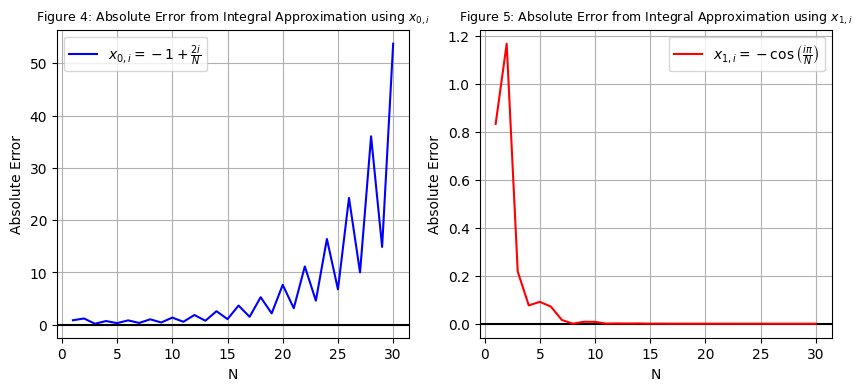

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt

#Defining our function f(x) = 1 / (1 + (3x)^2):

def f(x):
    return  1 / (1 + (3*x) ** 2)

#Chosing the values of N which we will test it on:

n = 30

N = list(range(1, n + 1))

#Defining each set of points:

#x_0,i:

def x_0i(n,i):
    return (-1 + (2 * i) / n)

#x_1,i:

def x_1i(n, i):
    return np.cos((i * np.pi)/n)

'''
Now we need to use both points to estimate the integral of f(x) over [-1,1].

In order to do this, we will have to define a function that will calculate the weights for each set of points (derived using lagrange interpolating polynomials),
as well as a function which will implement the associated quadrature rules.
'''

#Function to implement quadrature rule:

def quadrature(f, xk, wk):
    '''
    Approximates the integral of f over [-1, 1],
    using the quadrature rule with weights wk
    and nodes xk.
    
    Input:
    f (function): function to integrate (as a Python function object)
    xk (Numpy array): vector containing all nodes
    wk (Numpy array): vector containing all weights
    
    Returns:
    I_approx (float): the approximate value of the integral
        of f over [-1, 1], using the quadrature rule.
    '''
    
    # Compute the weighted sum
    I_approx = sum(wk * np.array([f(x) for x in xk]))

    
    return I_approx

#Function to calculate weights:

def interpolatory_quadrature_weights(x):
    
    '''
    This function takes in a shape (N+1, ) NumPy array with floating point scalar type defining our quadrature weights. 

    It then returns an (N+1, ) shape NumPy array which contains the the corresponding corresponding values for the interpolatory quadrature rule quadrature weights.

    The function does so by using lagrange interpolating polynomials. 

    Step 1 - we define our n, i.e. the length of our array

    Step 2 - we then define our legrange function to be used in the generation of our weights. 

    Step 3 - create a list where we are storing the coefficients of our lagrange basis polynomials for the values in the input array, x.

    Step 4 - define our weights function which integrates a polynomial over the interval [-1,1], which we will then apply to the elements in our lagrange list. 
    

    '''

    #Step 1:

    n = len(x)

    #Step 2:

    def lagrange(n, i):
        l = np.zeros(n, dtype=float)
        l[i] = 1
        return l

    #Step 3:

    lagrange_list = [np.polyfit(x, lagrange(n, i), n - 1 ) for i in range(n)]

    #Step 4:
    
    def weights(l):
        int = np.polyint(l)
        return np.polyval(int, 1) - np.polyval(int, -1)

    w = np.array([weights(l) for l in lagrange_list])

    return w


#Defining a function to return estimates for different values of N:

def approximations(N_values):
    result0 = []
    result1 = []

    for n in N:
        # Generate points:
        x_0 = np.array([x_0i(n, i) for i in range(1, n)], dtype=float)
        x_1 = np.array([x_1i(n, i) for i in range(1, n)], dtype=float)

        # Calculate weights:
        w_0 = interpolatory_quadrature_weights(x_0)
        w_1 = interpolatory_quadrature_weights(x_1)

        # Compute integral approximations:
        I_0 = quadrature(f, x_0, w_0)
        I_1 = quadrature(f, x_1, w_1)

        result0.append(I_0)
        result1.append(I_1)

    return result0, result1

#Exact integral:

exact = 1/3 * (np.arctan(3) - np.arctan(-3))

estimate0, estimate1 = approximations(N)

#Retrieving metrics for discussion:

estimate0_head_e = estimate0[:10] - exact
estimate1_head_e = estimate1[:10] - exact

max0_head = max(abs(estimate0_head_e))
max1_head = max(abs(estimate1_head_e))

estimate0_tail_e = estimate0[10:] - exact
estimate1_tail_e = estimate1[10:] - exact

max0_tail = max(abs(estimate0_tail_e))
max1_tail = max(abs(estimate1_tail_e))

print(f"Upper bound for error in the tail: x_0 :=  {max0_tail}, x_1 := {max1_tail}. Upper bound for error in first N = 10: x_0 {max0_head}, x_1 := {max1_head}")


#Generating Plots:

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].plot(N, abs(estimate0 - exact), color = 'blue', label =r'$x_{0,i} = -1 + \frac{2 i}{N}$')
ax[0].set_title(r'Figure 4: Absolute Error from Integral Approximation using $x_{0,i}$', fontsize=9)
ax[0].axhline(y = 0, color = 'k')
ax[0].set_xlabel('N')
ax[0].set_ylabel('Absolute Error')
ax[0].grid(True)
ax[0].legend()

ax[1].axhline(y = 0, color = 'k')
ax[1].plot(N, abs(estimate1 - exact), color = 'red', label = r'$x_{1,i} = -\cos \left( \frac{i \pi}{N} \right)$')
ax[1].set_title(r'Figure 5: Absolute Error from Integral Approximation using $x_{1,i}$', fontsize=9)
ax[1].set_xlabel('N')
ax[1].set_ylabel('Absolute Error')
ax[1].grid(True)
ax[1].legend()

plt.show()



## Exploring The Accuracy of Two Quadrature Points

We have been tasked with investigating how accurately the following sets of quadrature points, 

$$x_{0,i} = -1 + \frac{2 i}{N},$$

and

$$x_{1,i} = -\cos \left( \frac{i \pi}{N} \right),$$

defined for $i \in \left\{ 0, \ldots, N \right\}$, approximates the integral $\int_{-1}^1 f (x) dx,$ for different values of $N \ge 0,$ where

$$f(x) = \frac{1}{1 + (3 x)^2}.$$

First, we must determine the exact value of our integral, we can do so analytically:

$$\int_{-1}^1 f (x) dx = \frac{1}{3} [\tan^{-1}(3) - \tan^{-1}(-3)] \approx 0.832697.$$

Let us consider values of $N \in \left\{1, 2, \ldots, 30 \right\}$, allowing us to assess each set of points performance for both small and larger $N$.

Looking at Figure 4, we can see that for $N \le 10$, the error obtained from estimating our integral with $x_{0,i}$ is small. The absolute error in this range is bounded at $ M \approx 1.338$. However, looking at the graph over a larger range of $N$ we see that as $N$ increase the absolute value of our error also increases. So, as $N$ increase the set of quadrature points $x_{0,i}$ becomes less accurate.

The opposite can be said for $x_{1,i}$. Examining Figure 5 we can see that as $N$ increase, the accuracy of this method improves, with the absolute error tending towards zero. 

Not only is it significantly better at approximating our integral for larger $N$, it also provides a more accurate approximation for the first $N = 10$ terms, with absolute error being bounded by $M \approx 1.1673$, lower than the upper bound for the first method.

So, our conclusion is clear, the set of quadrature points, $x_{1,i}$, is the superior method when it comes to approximating the integral, 

$$ \int_{-1}^1 \frac{1}{1 + (3 x)^2}. $$